In [1]:
import os
dataset_path = "Monkeypox Skin Image Dataset"

class_names = os.listdir(dataset_path)
print("Class names:", class_names)

Class names: ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [2]:
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        count = 0
        for img in os.listdir(class_path):
            count = count + 1

        print(class_name, ":", count, "images")

Chickenpox : 91 images
Measles : 91 images
Monkeypox : 91 images
Normal : 91 images


In [3]:
# Split the dataset into three parameters like train, validation and test for building the model
# save it into output folder
import random
import shutil

output_path = "E:\MaxGen\git2025\MPDD\MonkeyPox-Disease-Prediction-System\dataset_split"

train_ratio = 0.7
test_ratio = 0.1
val_ratio = 0.2

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)


    if os.path.isdir(class_path):

        images = os.listdir(class_path)
        random.shuffle(images)

        total = len(images)
        train_end = int(total * train_ratio)
        val_end = train_end + int(total * val_ratio)

        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]


        for folder in ['train', 'val', 'test']:
            os.makedirs(os.path.join(output_path, folder, class_name), exist_ok=True)

        for img in train_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'train', class_name, img)
                
            )

        for img in test_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'val', class_name, img)
            )

        for img in test_images:
            shutil.copy(
                os.path.join(class_path, img),
                os.path.join(output_path, 'test', class_name, img)
            )

        print(class_name, "-> Train: ", len(train_images),
              "Val:", len(val_images),
              "Test:", len(test_images)
             )

Chickenpox -> Train:  63 Val: 18 Test: 10
Measles -> Train:  63 Val: 18 Test: 10
Monkeypox -> Train:  63 Val: 18 Test: 10
Normal -> Train:  63 Val: 18 Test: 10


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset_split\\train'
val_dir = 'dataset_split\\val'
test_dir = 'dataset_split\\test'

img_size = (224,224)
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
     rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)


In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 252 images belonging to 4 classes.


Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 224
img_width = 224
batch_size = 32
num_classes = 4

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D
)

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding="same",
                 input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Replace Flatten
model.add(GlobalAveragePooling2D())

# Dense
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Output
model.add(Dense(num_classes, activation="softmax"))


In [9]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      1

In [11]:

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 1.4665 - accuracy: 0.3651 - val_loss: 1.3785 - val_accuracy: 0.2500
Epoch 2/10
8/8 [==============================] - 22s 2s/step - loss: 1.3270 - accuracy: 0.4683 - val_loss: 1.3716 - val_accuracy: 0.2500
Epoch 3/10
8/8 [==============================] - 18s 2s/step - loss: 1.1852 - accuracy: 0.4405 - val_loss: 1.3550 - val_accuracy: 0.3250
Epoch 4/10
8/8 [==============================] - 16s 2s/step - loss: 1.1517 - accuracy: 0.5119 - val_loss: 1.3504 - val_accuracy: 0.3750
Epoch 5/10
8/8 [==============================] - 24s 3s/step - loss: 1.1246 - accuracy: 0.5238 - val_loss: 1.3750 - val_accuracy: 0.2500
Epoch 6/10
8/8 [==============================] - 19s 2s/step - loss: 1.0729 - accuracy: 0.5278 - val_loss: 1.3997 - val_accuracy: 0.2500
Epoch 7/10
8/8 [==============================] - 20s 3s/step - loss: 1.0762 - accuracy: 0.5119 - val_loss: 1.4465 - val_accuracy: 0.2500
Epoch 8/10
8/8 [==================

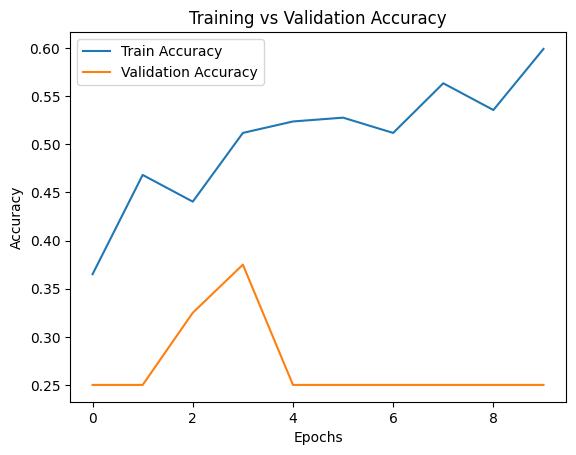

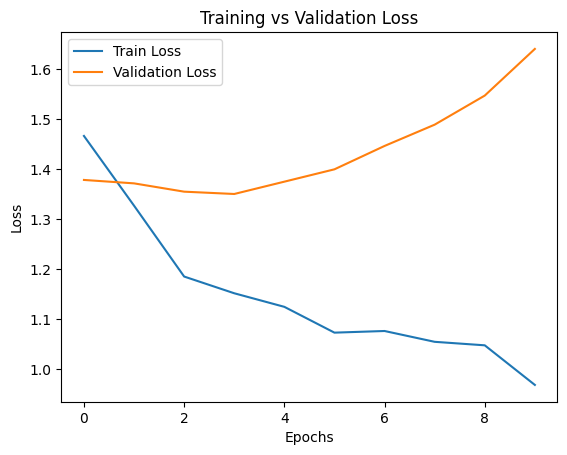

In [12]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.title("Training vs Validation Loss")
plt.show()


In [13]:
model.save("E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\newmodel\\MPDD159%.keras")

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from ipywidgets import FileUpload
from PIL import Image

In [15]:
from keras.models import load_model
model = load_model("newmodel\MPDD159%.keras")

In [16]:
class_names = list(test_data.class_indices.keys())
print("Class names:", class_names)

Class names: ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [17]:
def predict_image_from_path(img_path):
    # Load image
    img = Image.open(img_path).convert("RGB")

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Preprocess
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    class_index = np.argmax(predictions)

    print("Predicted Class :", class_names[class_index])
    print("Confidence     :", round(confidence * 100, 2), "%")

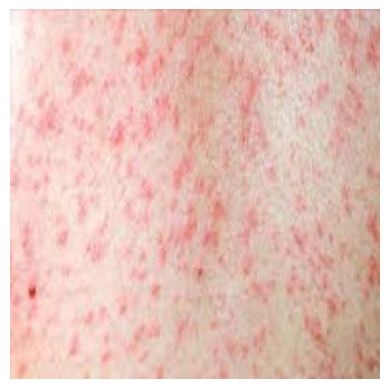

1/1 [==============================] - 0s 329ms/step
Predicted Class : Chickenpox
Confidence     : 59.13 %


In [18]:
image_path = "E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\Monkeypox Skin Image Dataset\\Measles\\measles3.png"
predict_image_from_path(image_path)

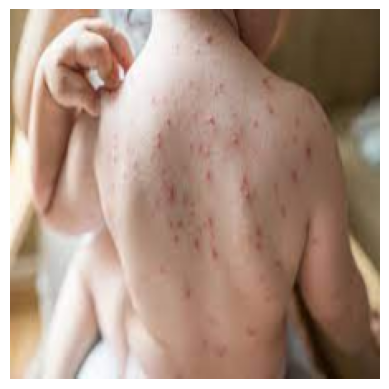

1/1 [==============================] - 0s 38ms/step
Predicted Class : Chickenpox
Confidence     : 63.07 %


In [19]:
image_path = "E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox1.png"
predict_image_from_path(image_path)

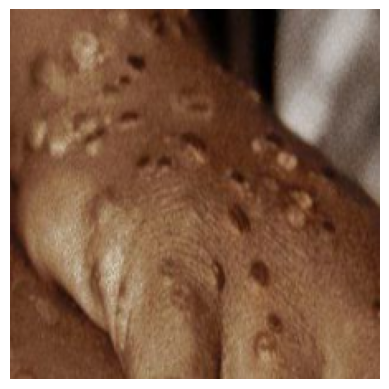

1/1 [==============================] - 0s 34ms/step
Predicted Class : Chickenpox
Confidence     : 64.16 %


In [20]:
image_path = "E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\Monkeypox Skin Image Dataset\\Monkeypox\\monkeypox2.png"
predict_image_from_path(image_path)

In [21]:
# Apply an optimizer to the existing CNN and recompile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled with optimizer:", optimizer._name, "lr=", optimizer.learning_rate.numpy())

Model compiled with optimizer: Adam lr= 1e-04


In [22]:
model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 0.9905 - accuracy: 0.5833 - val_loss: 1.6830 - val_accuracy: 0.2500
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.9687 - accuracy: 0.5635 - val_loss: 1.7354 - val_accuracy: 0.2500
Epoch 3/20
8/8 [==============================] - 14s 2s/step - loss: 1.0377 - accuracy: 0.5556 - val_loss: 1.7885 - val_accuracy: 0.2500
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.9980 - accuracy: 0.5476 - val_loss: 1.8420 - val_accuracy: 0.2500
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 1.0229 - accuracy: 0.5873 - val_loss: 1.8859 - val_accuracy: 0.2500
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.9715 - accuracy: 0.5635 - val_loss: 1.9266 - val_accuracy: 0.2500
Epoch 7/20
8/8 [==============================] - 16s 2s/step - loss: 0.9642 - accuracy: 0.5992 - val_loss: 1.9712 - val_accuracy: 0.2500
Epoch 8/20
8/8 [==================

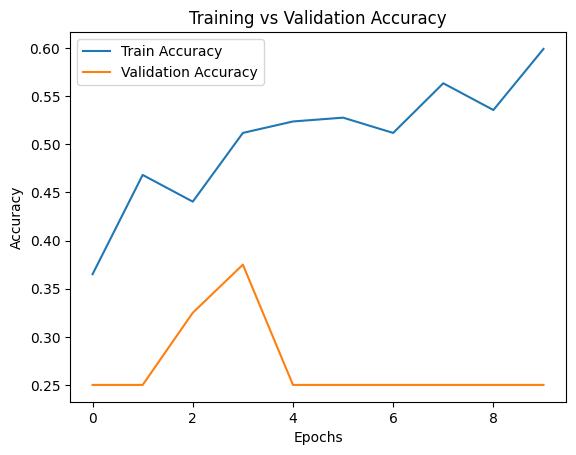

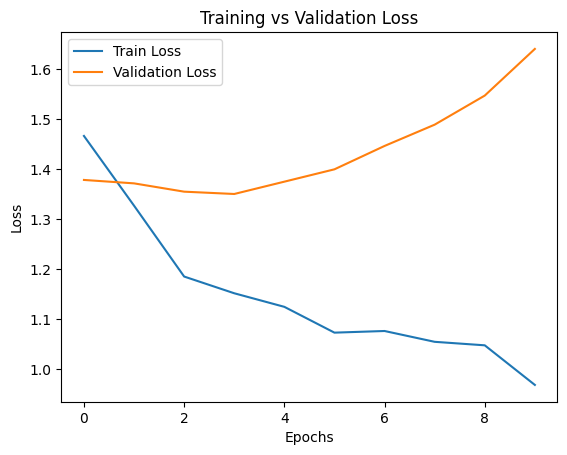

In [23]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.title("Training vs Validation Loss")
plt.show()


In [24]:
model.save("E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\newmodel\\MPDD160%.keras")

In [25]:
from keras.models import load_model
model = load_model("E:\\MaxGen\\git2025\\MPDD\\MonkeyPox-Disease-Prediction-System\\newmodel\\MPDD160%.keras")

In [26]:
class_names = list(test_data.class_indices.keys())
print("Class names:", class_names)

Class names: ['Chickenpox', 'Measles', 'Monkeypox', 'Normal']


In [27]:
def predict_image_from_path(img_path):
    # Load image
    img = Image.open(img_path).convert("RGB")

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Preprocess
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    class_index = np.argmax(predictions)

    print("Predicted Class :", class_names[class_index])
    print("Confidence     :", round(confidence * 100, 2), "%")

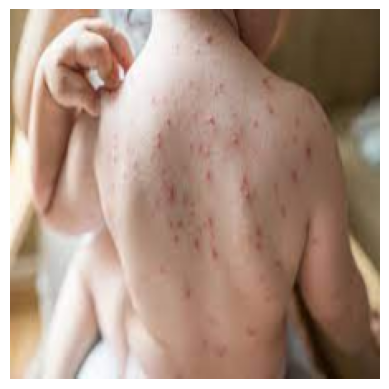

1/1 [==============================] - 0s 134ms/step
Predicted Class : Chickenpox
Confidence     : 87.46 %


In [28]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox1.png"
predict_image_from_path(image_path)

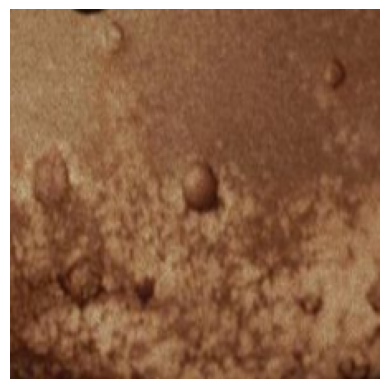

1/1 [==============================] - 0s 37ms/step
Predicted Class : Chickenpox
Confidence     : 83.85 %


In [29]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\monkeypox\\monkeypox7.png"
predict_image_from_path(image_path)

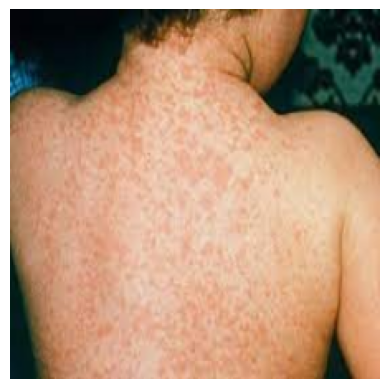

1/1 [==============================] - 0s 34ms/step
Predicted Class : Chickenpox
Confidence     : 86.51 %


In [31]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Measles\\measles1.png"
predict_image_from_path(image_path)

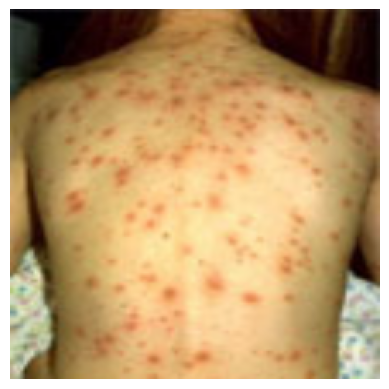

1/1 [==============================] - 0s 42ms/step
Predicted Class : Chickenpox
Confidence     : 87.2 %


In [32]:
image_path = "E:\\MaxGen\\Deep Learning\\MPDD\\Monkeypox Skin Image Dataset\\Chickenpox\\chickenpox107.png"
predict_image_from_path(image_path)